In [195]:
import numpy as np
import torch
# import torch.nn as nn
# import einops
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt

## Accuracy

In [196]:
accuracy_rocket_original = {}

with open('accuracy.txt') as f:
    for line in f:
        line = line.split('&')
        line = [l.strip() for l in line]
        line = [l.strip('\\') for l in line]
        line = [l.strip() for l in line]
        accuracy_rocket_original[line[0]] = float(line[1])
dataset_names = list(accuracy_rocket_original.keys())

In [197]:
coords = np.zeros((len(dataset_names), 3))

for i, dataset_name in enumerate(dataset_names):
    path_save_ste = 'results/' + dataset_name + '_ste.h5'
    path_save_rc = 'results/' + dataset_name + '_rc.h5'

    try:
        with h5py.File(path_save_ste, 'r') as file:
            value_ste = file.attrs['acc']
    except:
        value_ste = 0
        
    try:
        with h5py.File(path_save_rc, 'r') as file:
            value_rc = file.attrs['acc']
    except:
        value_rc = 0

    coords[i, 0] = accuracy_rocket_original[dataset_name]
    coords[i, 1] = value_ste
    coords[i, 2] = value_rc

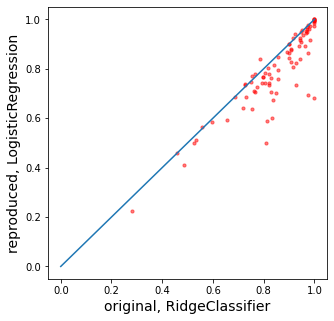

In [198]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
fontsize = 14
plt.scatter(coords[:,0], coords[:,1], s=10, c='r', alpha=0.5)
ax.set_ylabel('reproduced, LogisticRegression', fontsize=fontsize)
ax.set_xlabel('original, RidgeClassifier', fontsize=fontsize)
ax.plot([0, 1, 1, 1], [0, 1, 1, 1])
fig.savefig('figures/originalRC_vs_reproducedLR')
plt.show()

In [188]:
print(np.corrcoef(coords[:,0], coords[:,1])[0, 1])

0.8915363282748978


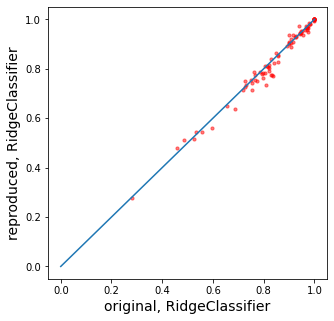

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
fontsize = 14
plt.scatter(coords[:,0], coords[:,2], s=10, c='r', alpha=0.5)
ax.set_ylabel('reproduced, RidgeClassifier', fontsize=fontsize)
ax.set_xlabel('original, RidgeClassifier', fontsize=fontsize)
ax.plot([0, 1, 1, 1], [0, 1, 1, 1])
fig.savefig('figures/originalRC_vs_reproducedRC')
plt.show()

In [200]:
print(np.corrcoef(coords[:,0], coords[:,2])[0, 1])

0.9909085725845281


## Estimater Ranks

In [201]:
dataset_names_small = []
for dataset_name in dataset_names:
    if dataset_name not in ['ElectricDevices', 'StarLightCurves', 'UWaveGestureLibraryAll']:
        dataset_names_small.append(dataset_name)

estimate_names = ['ste', 'ee', 'mcde', 'ffteU']
score_names = ['acc', 'nll', 'bs', 'ece']

scores = np.zeros((len(dataset_names_small), len(estimate_names), len(score_names)))

for i, dataset_name in enumerate(dataset_names_small):
    for j, estimate_name in enumerate(estimate_names):
        for k, score_name in enumerate(score_names):
            path_save = f'results/{dataset_name}_{estimate_name}.h5'
            with h5py.File(path_save, 'r') as file:
                value = file.attrs[score_name]
            scores[i,j,k] = value

In [202]:
scores_ranks = np.argsort(scores, axis=1) + 1
scores_mean_ranks = np.mean(scores_ranks, axis=0)

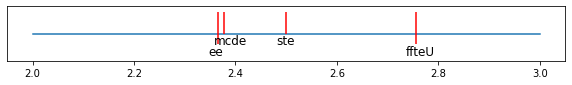

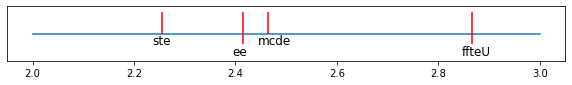

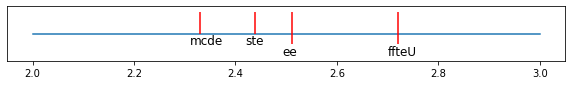

In [204]:
for j in range(1, 4):
    fig, ax = plt.subplots(1, 1, figsize=(10, 1))
    scale = np.linspace(2, 3, 1000)

    ax.plot(scale, np.zeros(1000))
    ax.set_ylim(-1, 1)
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        labelleft=False) # labels along the bottom edge are off
    for i in range(4):
        ax.vlines(scores_mean_ranks[i, j], 0 - 0.4*(i % 2), 0.8 , colors='r', linestyles='solid', label=estimate_names[i])
        ax.text(scores_mean_ranks[i, j]-0.02, -0.4 - 0.4*(i % 2), estimate_names[i], fontsize='large')
    fig.savefig(f'figures/{score_names[j]}')
# plt.show()